In [ ]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Checks if a GPU is available for TensorFlow
if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


# Directories

In [ ]:
# dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
# dataset = 'model/keypoint_classifier/keypoint.csv'
dataset = "/content/drive/MyDrive/Colab Notebooks/ML CW/HaGridDataset.csv"
model_save_path = "/content/drive/MyDrive/Colab Notebooks/ML CW/"

# Number of classes

In [ ]:
NUM_CLASSES = 26

In [ ]:
EPOCHS = 1000
PATIENCE = 20

In [ ]:
cols_name = ['command', 'x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3', 'x_4', 'y_4', 'x_5', 'y_5', 'x_6', 'y_6', 'x_7', 'y_7', 'x_8', 'y_8', 'x_9', 'y_9', 'x_10', 'y_10', 'x_11', 'y_11', 'x_12', 'y_12', 'x_13', 'y_13', 'x_14', 'y_14', 'x_15', 'y_15', 'x_16', 'y_16', 'x_17', 'y_17', 'x_18', 'y_18', 'x_19', 'y_19', 'x_20', 'y_20']
data = pd.read_csv(dataset, names = cols_name, header=None)

# Data analysis

In [ ]:
data.describe()

,command,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,...,x_16,y_16,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20
count,835.000000,835.0,835.0,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,8.839521,0.0,0.0,0.001452,-0.099484,-0.001053,-0.232234,-0.006666,-0.335600,-0.014425,...,0.001360,-0.387292,-0.004091,-0.275619,-0.005533,-0.338111,-0.003256,-0.313276,0.000960,-0.302968
std,5.333764,0.0,0.0,0.169296,0.125895,0.284033,0.250579,0.338741,0.362716,0.371046,...,0.289128,0.493911,0.279543,0.292065,0.363344,0.387837,0.370025,0.413860,0.381096,0.443918
min,0.000000,0.0,0.0,-0.448980,-0.356808,-0.806122,-0.620513,-0.962121,-0.849711,-0.856061,...,-1.000000,-1.000000,-0.680064,-0.901361,-0.898824,-1.000000,-0.905983,-0.930876,-1.000000,-1.000000
25%,4.000000,0.0,0.0,-0.145575,-0.178847,-0.242909,-0.358117,-0.261336,-0.485220,-0.269607,...,-0.149430,-0.907001,-0.195394,-0.422745,-0.227926,-0.561520,-0.220476,-0.648016,-0.193938,-0.693818
50%,10.000000,0.0,0.0,0.003460,-0.106280,0.000000,-0.279167,-0.015748,-0.422983,-0.033582,...,0.006452,-0.386525,-0.018987,-0.358079,0.000000,-0.445946,0.006711,-0.373585,0.008114,-0.307918
75%,14.000000,0.0,0.0,0.146086,-0.060915,0.227627,-0.207258,0.248190,-0.320303,0.244352,...,0.140499,-0.196330,0.186296,-0.269000,0.222222,-0.294242,0.210669,-0.217202,0.198070,-0.172044
max,17.000000,0.0,0.0,0.416667,0.408333,0.842105,0.672131,1.000000,0.942623,1.000000,...,1.000000,1.000000,0.829787,0.783505,1.000000,1.000000,0.923077,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   command  835 non-null    int64  
 1   x_0      835 non-null    float64
 2   y_0      835 non-null    float64
 3   x_1      835 non-null    float64
 4   y_1      835 non-null    float64
 5   x_2      835 non-null    float64
 6   y_2      835 non-null    float64
 7   x_3      835 non-null    float64
 8   y_3      835 non-null    float64
 9   x_4      835 non-null    float64
 10  y_4      835 non-null    float64
 11  x_5      835 non-null    float64
 12  y_5      835 non-null    float64
 13  x_6      835 non-null    float64
 14  y_6      835 non-null    float64
 15  x_7      835 non-null    float64
 16  y_7      835 non-null    float64
 17  x_8      835 non-null    float64
 18  y_8      835 non-null    float64
 19  x_9      835 non-null    float64
 20  y_9      835 non-null    float64
 21  x_10     835 non

In [ ]:
data.head()

,command,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,...,x_16,y_16,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20
0,0,0.0,0.0,-0.169697,-0.290909,-0.381818,-0.490909,-0.545455,-0.642424,-0.600000,...,-0.521212,0.078788,-0.539394,0.193939,-0.763636,0.327273,-0.890909,0.418182,-1.0,0.490909
1,0,0.0,0.0,0.029197,-0.262774,0.153285,-0.496350,0.255474,-0.671533,0.233577,...,0.503650,-0.065693,0.503650,-0.043796,0.737226,-0.043796,0.875912,-0.014599,1.0,-0.014599
2,0,0.0,0.0,0.101695,-0.237288,0.299435,-0.468927,0.446328,-0.644068,0.514124,...,0.548023,0.056497,0.468927,0.090395,0.717514,0.220339,0.858757,0.316384,1.0,0.384181
3,0,0.0,0.0,-0.125984,-0.228346,-0.259843,-0.377953,-0.307087,-0.527559,-0.283465,...,-0.496063,0.078740,-0.496063,0.000000,-0.724409,0.102362,-0.874016,0.173228,-1.0,0.228346
4,0,0.0,0.0,0.003460,-0.273356,-0.103806,-0.550173,-0.155709,-0.764706,-0.089965,...,-0.539792,-0.138408,-0.505190,-0.062284,-0.743945,-0.086505,-0.885813,-0.083045,-1.0,-0.103806


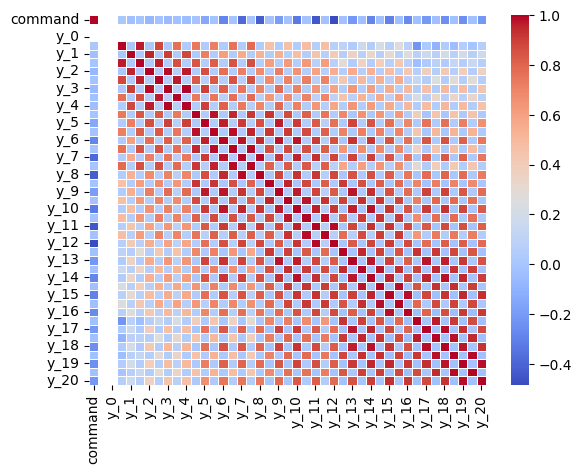

In [ ]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

array([[<Axes: title={'center': 'command'}>,
        <Axes: title={'center': 'x_0'}>, <Axes: title={'center': 'y_0'}>,
        <Axes: title={'center': 'x_1'}>, <Axes: title={'center': 'y_1'}>,
        <Axes: title={'center': 'x_2'}>, <Axes: title={'center': 'y_2'}>],
       [<Axes: title={'center': 'x_3'}>, <Axes: title={'center': 'y_3'}>,
        <Axes: title={'center': 'x_4'}>, <Axes: title={'center': 'y_4'}>,
        <Axes: title={'center': 'x_5'}>, <Axes: title={'center': 'y_5'}>,
        <Axes: title={'center': 'x_6'}>],
       [<Axes: title={'center': 'y_6'}>, <Axes: title={'center': 'x_7'}>,
        <Axes: title={'center': 'y_7'}>, <Axes: title={'center': 'x_8'}>,
        <Axes: title={'center': 'y_8'}>, <Axes: title={'center': 'x_9'}>,
        <Axes: title={'center': 'y_9'}>],
       [<Axes: title={'center': 'x_10'}>,
        <Axes: title={'center': 'y_10'}>,
        <Axes: title={'center': 'x_11'}>,
        <Axes: title={'center': 'y_11'}>,
        <Axes: title={'center': 'x_1

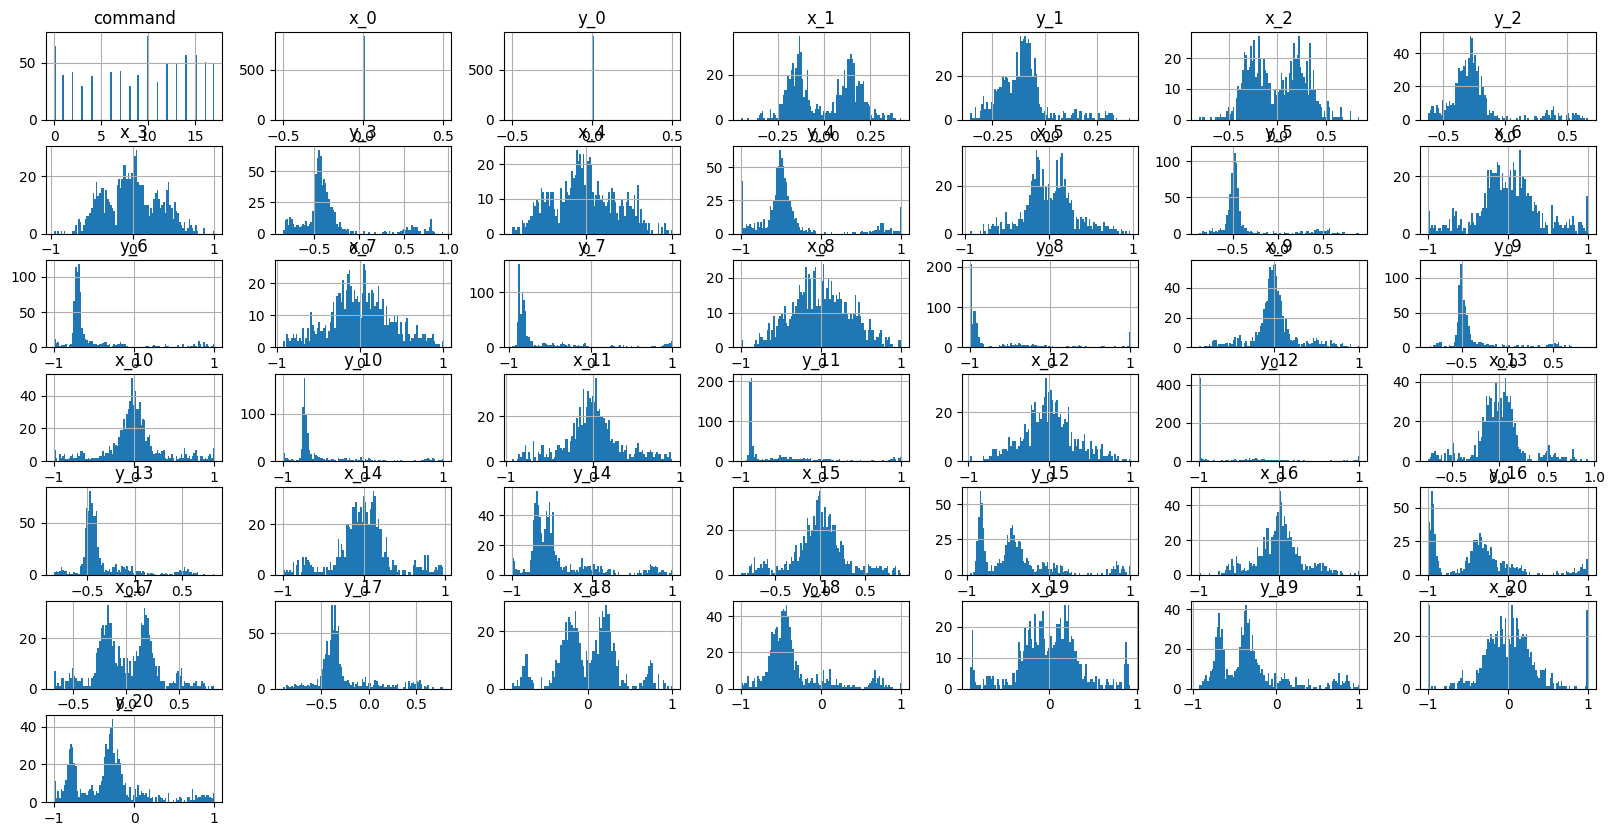

In [ ]:
data.hist(bins=100, figsize=(20, 10))

In [ ]:
data.shape

(835, 43)

# Load

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.80, random_state=RANDOM_SEED)

# First split: Splitting into training and temp_test set (80% training, 20% temp_test)
X_train, X_temp_test, y_train, y_temp_test = train_test_split(
    X_dataset, y_dataset, train_size=0.80, random_state=RANDOM_SEED)

# Second split: Splitting the temp_test into test and validation set (50% test, 50% validation from temp_test)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp_test, y_temp_test, train_size=0.50, random_state=RANDOM_SEED)

# Models

In [ ]:
res = [] # model, accuracy

## NN1


In [ ]:
nn1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
nn1.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 26)                546       
                                                                 
Total params: 1406 (5.49 KB)
Trainable params: 1406 (5.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=PATIENCE, verbose=1)

In [ ]:
nn1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = nn1.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=128,
    validation_data=(X_val, y_val),
    # callbacks=[cp_callback, es_callback]
    callbacks=[es_callback]
)

Epoch 1/1000
6/6 [==============================] - 1s 65ms/step - loss: 3.3186 - accuracy: 0.0314 - val_loss: 3.2734 - val_accuracy: 0.1190
Epoch 2/1000
6/6 [==============================] - 0s 11ms/step - loss: 3.2740 - accuracy: 0.0509 - val_loss: 3.2405 - val_accuracy: 0.1071
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 3.2424 - accuracy: 0.0629 - val_loss: 3.2095 - val_accuracy: 0.0833
Epoch 4/1000
6/6 [==============================] - 0s 15ms/step - loss: 3.2252 - accuracy: 0.0689 - val_loss: 3.1801 - val_accuracy: 0.0714
Epoch 5/1000
6/6 [==============================] - 0s 17ms/step - loss: 3.2004 - accuracy: 0.0868 - val_loss: 3.1512 - val_accuracy: 0.0714
Epoch 6/1000
6/6 [==============================] - 0s 14ms/step - loss: 3.1711 - accuracy: 0.1078 - val_loss: 3.1215 - val_accuracy: 0.0833
Epoch 7/1000
6/6 [==============================] - 0s 13ms/step - loss: 3.1411 - accuracy: 0.1138 - val_loss: 3.0927 - val_accuracy: 0.0833
Epoch 8/1000


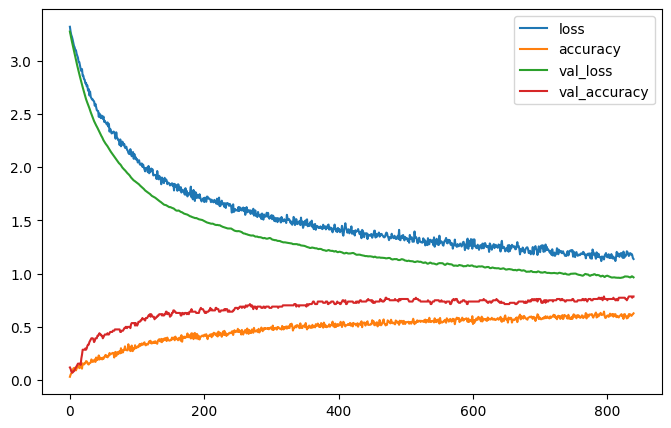

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
val_loss, val_acc = nn1.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 31ms/step - loss: 1.0598 - accuracy: 0.7229


In [ ]:
res.append(("nn1", val_loss, val_acc))

3/3 [==============================] - 0s 5ms/step


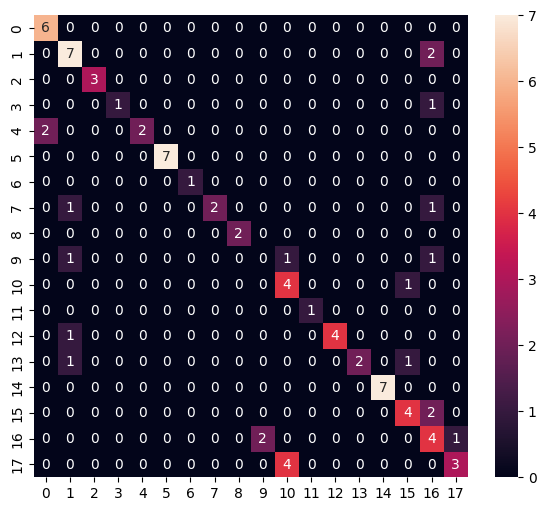

Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.64      0.78      0.70         9
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         4
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         3
          10       0.44      0.80      0.57         5
          11       1.00      1.00      1.00         1
          12       1.00      0.80      0.89         5
          13       1.00      0.50      0.67         4
          14       1.00      1.00      1.00         7
          15       0.67      0.67      0.67         6
          16       0.36      0.57      0.44         7
     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = nn1.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

## NN2

In [ ]:
nn2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
nn2.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 42)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                860       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 26)                286       
                                                                 
Total params: 1356 (5.30 KB)
Trainable params: 1356 (5.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
    # model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=PATIENCE, verbose=1)

In [ ]:
nn2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = nn2.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=128,
    validation_data=(X_val, y_val),
    # callbacks=[cp_callback, es_callback]
    callbacks=[es_callback]
)

Epoch 1/1000
6/6 [==============================] - 1s 52ms/step - loss: 3.2570 - accuracy: 0.0479 - val_loss: 3.2041 - val_accuracy: 0.0357
Epoch 2/1000
6/6 [==============================] - 0s 14ms/step - loss: 3.2344 - accuracy: 0.0419 - val_loss: 3.1734 - val_accuracy: 0.0238
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 3.2067 - accuracy: 0.0778 - val_loss: 3.1490 - val_accuracy: 0.0952
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 3.1786 - accuracy: 0.0644 - val_loss: 3.1289 - val_accuracy: 0.1071
Epoch 5/1000
6/6 [==============================] - 0s 14ms/step - loss: 3.1685 - accuracy: 0.0749 - val_loss: 3.1092 - val_accuracy: 0.1190
Epoch 6/1000
6/6 [==============================] - 0s 19ms/step - loss: 3.1343 - accuracy: 0.0868 - val_loss: 3.0882 - val_accuracy: 0.1429
Epoch 7/1000
6/6 [==============================] - 0s 15ms/step - loss: 3.1326 - accuracy: 0.0928 - val_loss: 3.0629 - val_accuracy: 0.1667
Epoch 8/1000


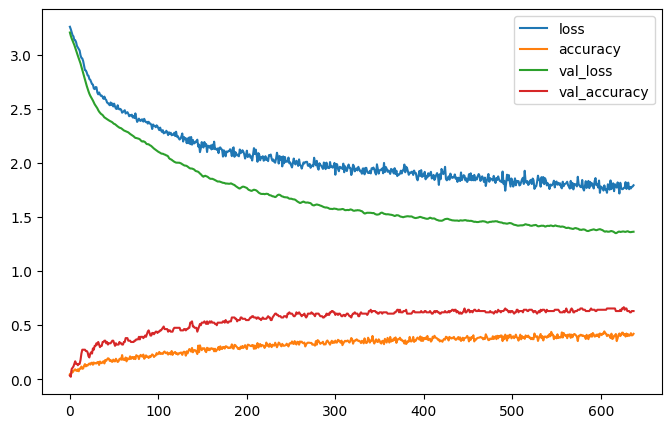

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
val_loss, val_acc = nn2.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 70ms/step - loss: 1.4683 - accuracy: 0.6386


In [ ]:
res.append(("nn2", val_loss, val_acc))

In [ ]:
# model = tf.keras.models.load_model(model_save_path)

In [ ]:
predict_result = nn2.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 159ms/step
[7.79554546e-02 8.37794141e-05 3.35800610e-02 5.21083036e-03
 4.76237014e-02 3.22247714e-01 2.73335516e-03 7.81616867e-02
 5.77004766e-03 6.23200610e-02 1.51482657e-01 6.12360053e-03
 2.00719223e-03 7.27565447e-03 2.11441536e-02 8.23577046e-02
 1.99467428e-02 7.39753991e-02 1.83576843e-09 1.10805598e-09
 3.18345172e-09 1.48173696e-08 2.12933382e-09 6.73231956e-11
 1.05165066e-09 1.84648442e-07]
5


3/3 [==============================] - 0s 6ms/step


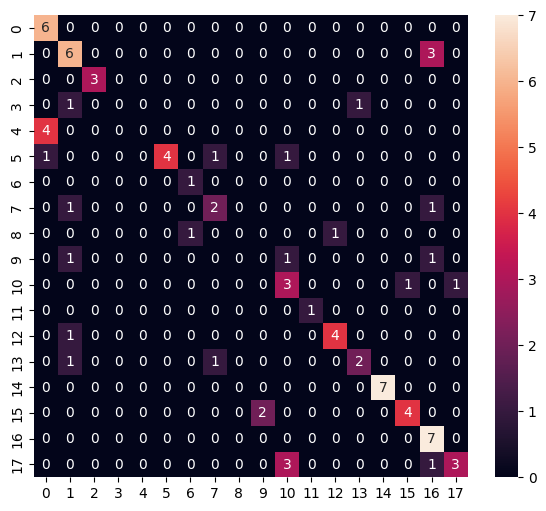

Classification Report
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       0.55      0.67      0.60         9
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       1.00      0.57      0.73         7
           6       0.50      1.00      0.67         1
           7       0.50      0.50      0.50         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.38      0.60      0.46         5
          11       1.00      1.00      1.00         1
          12       0.80      0.80      0.80         5
          13       0.67      0.50      0.57         4
          14       1.00      1.00      1.00         7
          15       0.80      0.67      0.73         6
          16       0.54      1.00      0.70         7
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = nn2.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

## NN3

In [ ]:
nn3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
nn3.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 42)                0         
                                                                 
 dense_5 (Dense)             (None, 30)                1290      
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 26)               

In [ ]:
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
    # model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=PATIENCE, verbose=1)

In [ ]:
nn3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = nn3.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=128,
    validation_data=(X_val, y_val),
    # callbacks=[cp_callback, es_callback]
    callbacks=[es_callback]
)

Epoch 1/1000
6/6 [==============================] - 2s 90ms/step - loss: 3.2869 - accuracy: 0.0344 - val_loss: 3.2360 - val_accuracy: 0.0595
Epoch 2/1000
6/6 [==============================] - 0s 25ms/step - loss: 3.2866 - accuracy: 0.0569 - val_loss: 3.2236 - val_accuracy: 0.1190
Epoch 3/1000
6/6 [==============================] - 0s 19ms/step - loss: 3.2521 - accuracy: 0.0509 - val_loss: 3.2150 - val_accuracy: 0.1548
Epoch 4/1000
6/6 [==============================] - 0s 22ms/step - loss: 3.2498 - accuracy: 0.0808 - val_loss: 3.2078 - val_accuracy: 0.2024
Epoch 5/1000
6/6 [==============================] - 0s 21ms/step - loss: 3.2250 - accuracy: 0.0704 - val_loss: 3.1999 - val_accuracy: 0.2024
Epoch 6/1000
6/6 [==============================] - 0s 24ms/step - loss: 3.2216 - accuracy: 0.0778 - val_loss: 3.1917 - val_accuracy: 0.1905
Epoch 7/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.2063 - accuracy: 0.0674 - val_loss: 3.1827 - val_accuracy: 0.1905
Epoch 8/1000


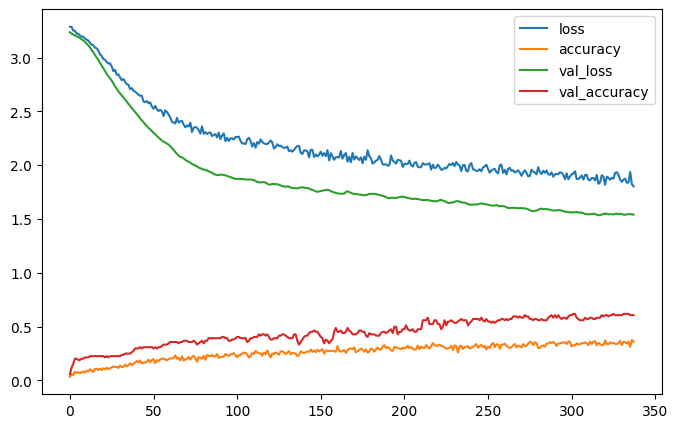

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
val_loss, val_acc = nn3.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 41ms/step - loss: 1.4994 - accuracy: 0.6145


In [ ]:
res.append(("nn3", val_loss, val_acc))

3/3 [==============================] - 0s 6ms/step


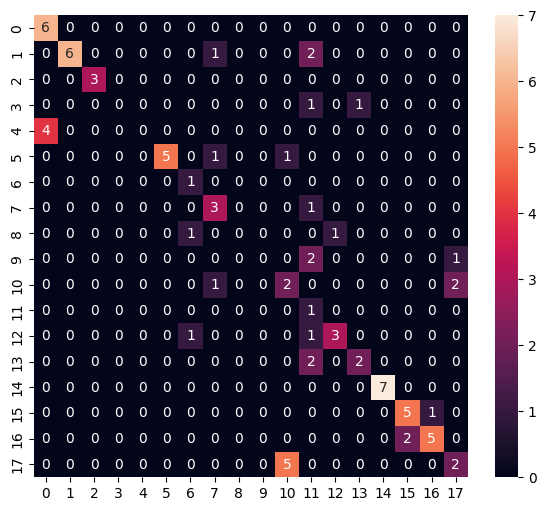

Classification Report
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.67      0.80         9
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       1.00      0.71      0.83         7
           6       0.33      1.00      0.50         1
           7       0.50      0.75      0.60         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.25      0.40      0.31         5
          11       0.10      1.00      0.18         1
          12       0.75      0.60      0.67         5
          13       0.67      0.50      0.57         4
          14       1.00      1.00      1.00         7
          15       0.71      0.83      0.77         6
          16       0.83      0.71      0.77         7
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = nn3.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

### Save model

In [ ]:
nn3.save(model_save_path, include_optimizer=False)

In [ ]:
# tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
tflite_save_path = "/content/drive/MyDrive/Colab Notebooks/ML CW/keypoint_classifier.tflite"

converter = tf.lite.TFLiteConverter.from_keras_model(nn2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7540

### Interpret model

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 119 µs, sys: 5 µs, total: 124 µs
Wall time: 130 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.79554248e-02 8.37794942e-05 3.35800499e-02 5.21083502e-03
 4.76236828e-02 3.22247714e-01 2.73335795e-03 7.81616569e-02
 5.77005278e-03 6.23200461e-02 1.51482686e-01 6.12360006e-03
 2.00719223e-03 7.27565633e-03 2.11441629e-02 8.23577270e-02
 1.99467428e-02 7.39754140e-02 1.83577198e-09 1.10805809e-09
 3.18345772e-09 1.48173696e-08 2.12933782e-09 6.73233205e-11
 1.05165254e-09 1.84648428e-07]
5


## Diff algorithms

In [ ]:
x = data.drop('command', axis=1)  # features
y = data['command']  # target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


## Decision Tree

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up GridSearchCV to find the best parameters using the K-fold CV
grid_search = GridSearchCV(dt, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Perform hyperparameter optimization
grid_search.fit(x_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict the test set using the best model
y_pred = best_dt.predict(x_test)

# probability
y_prob = best_dt.predict_proba(x_test)
print("Probabilities of the first few samples:\n", y_prob[:2])

# Print the classification report
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)
res.append(("decision tree", accuracy))


Fitting 10 folds for each of 576 candidates, totalling 5760 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}
Probabilities of the first few samples:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.62      1.00      0.77         5
           2       0.73      0.92      0.81        12
           3       0.44      0.67      0.53         6
           4       0.80      0.67      0.73         6
           5       0.83      0.91      0.87        11
           6       0.92      1.00      0.96        11
           7       1.00      0.89      0.94         9
           8       0.20      0.33      0.25         3
           9       0.38      0.38      0.38         8
          10       0.54      0.54      0.54        13
          11       1.00      0.57      0.73         7
          12       0.57      

### Save model

In [ ]:
from joblib import dump, load

model_save_path = '/content/drive/MyDrive/Colab Notebooks/ML CW/decision_tree_model.joblib'
dump(best_dt, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/Colab Notebooks/ML CW/decision_tree_model.joblib


### Load and test the model

In [ ]:
# Load the model from disk
loaded_model = load(model_save_path)
print("Model loaded successfully")

Model loaded successfully


In [ ]:
%%time
n = 5
single_test_instance = np.array(x_test.iloc[n]).reshape(1, -1)
y_pred_loaded = loaded_model.predict(single_test_instance)
print(y_test.iloc[n], y_pred_loaded[0])
print()
# y_test

9 2

CPU times: user 4.86 ms, sys: 0 ns, total: 4.86 ms
Wall time: 5.03 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up GridSearchCV with the Random Forest classifier
grid_search = GridSearchCV(rf, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Perform hyperparameter optimization
grid_search.fit(x_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# probability
y_prob = best_dt.predict_proba(x_test)
print("Probabilities of the first few samples:\n", y_prob[:2])

# Predict on the test set using the best model
y_pred = best_rf.predict(x_test)

# Print the classification report
accuracy = accuracy_score(y_test, y_pred)
res.append(("Random Forest", accuracy))
print(accuracy)
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Probabilities of the first few samples:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.8143712574850299
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.50      0.80      0.62         5
           2       0.77      0.83      0.80        12
           3       1.00      0.83      0.91         6
           4       0.67      0.67      0.67         6
           5       0.90      0.82      0.86        11
           6       0.92      1.00      0.96        11
           7       0.73      0.89      0.80         9
           8       0.67      0.67      0.67         3
           9       0.75      0.38      0.50         8
          10       0.69      0.6

## SVM

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from sklearn.svm import SVC

# Define a parameter grid to search for best parameters for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],  # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize the classifier
svc = SVC(random_state=42)

# Create a KFold cross validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=kfold, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

print(grid_search)

# Get the best estimator and print out the parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict with the best estimator
y_pred = grid_search.best_estimator_.predict(x_test)

# probability
# y_prob = best_dt.predict_proba(x_test)
# print("Probabilities of the first few samples:\n", y_prob[:2])

# Print the classification report
accuracy = accuracy_score(y_test, y_pred)
# res.append(("SVM", accuracy))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.50      0.80      0.62         5
           2       0.91      0.83      0.87        12
           3       0.71      0.83      0.77         6
           4       0.57      0.67      0.62         6
           5       0.78      0.64      0.70        11
           6       0.92      1.00      0.96        11
           7       0.75      1.00      0.86         9
           8       1.0

# Final Results of the models

In [ ]:
res

[('nn1', 1.0598491430282593, 0.7228915691375732),
 ('nn2', 1.4682683944702148, 0.6385542154312134),
 ('nn3', 1.4993672370910645, 0.6144578456878662),
 ('decision tree', 0.7425149700598802),
 ('Random Forest', 0.8143712574850299)]